# 1. Cleaning the Data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shelve
import os
from IPython.display import display

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

/accounts/class/s159/s159-9/.conda/envs/demographics/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
adult = pd.read_csv("data/adult.csv")
adult.shape

(32561, 15)

This seems like a nice dataset. Let's look at the first few rows.

In [3]:
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Let's also look at the unique values each column has.

In [4]:
for column in adult.columns:
    print("Unique Values in Column " + column)
    display(adult[column].unique())
    print("")

Unique Values in Column age


array([90, 82, 66, 54, 41, 34, 38, 74, 68, 45, 52, 32, 51, 46, 57, 22, 37,
       29, 61, 21, 33, 49, 23, 59, 60, 63, 53, 44, 43, 71, 48, 73, 67, 40,
       50, 42, 39, 55, 47, 31, 58, 62, 36, 72, 78, 83, 26, 70, 27, 35, 81,
       65, 25, 28, 56, 69, 20, 30, 24, 64, 75, 19, 77, 80, 18, 17, 76, 79,
       88, 84, 85, 86, 87])


Unique Values in Column workclass


array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'], dtype=object)


Unique Values in Column fnlwgt


array([ 77053, 132870, 186061, ...,  34066,  84661, 257302])


Unique Values in Column education


array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'], dtype=object)


Unique Values in Column education.num


array([ 9, 10,  4,  6, 16, 15, 13, 14,  7, 12, 11,  2,  3,  8,  5,  1])


Unique Values in Column marital.status


array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'], dtype=object)


Unique Values in Column occupation


array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair', 'Transport-moving',
       'Handlers-cleaners', 'Sales', 'Farming-fishing', 'Tech-support',
       'Protective-serv', 'Armed-Forces', 'Priv-house-serv'], dtype=object)


Unique Values in Column relationship


array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)


Unique Values in Column race


array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)


Unique Values in Column sex


array(['Female', 'Male'], dtype=object)


Unique Values in Column capital.gain


array([    0, 99999, 41310, 34095, 27828, 25236, 25124, 22040, 20051,
       18481, 15831, 15024, 15020, 14344, 14084, 13550, 11678, 10605,
       10566, 10520,  9562,  9386,  8614,  7978,  7896,  7688,  7443,
        7430,  7298,  6849,  6767,  6723,  6514,  6497,  6418,  6360,
        6097,  5721,  5556,  5455,  5178,  5060,  5013,  4934,  4931,
        4865,  4787,  4687,  4650,  4508,  4416,  4386,  4101,  4064,
        3942,  3908,  3887,  3818,  3781,  3674,  3471,  3464,  3456,
        3432,  3418,  3411,  3325,  3273,  3137,  3103,  2993,  2977,
        2964,  2961,  2936,  2907,  2885,  2829,  2653,  2635,  2597,
        2580,  2538,  2463,  2414,  2407,  2387,  2354,  2346,  2329,
        2290,  2228,  2202,  2176,  2174,  2105,  2062,  2050,  2036,
        2009,  1848,  1831,  1797,  1639,  1506,  1471,  1455,  1424,
        1409,  1173,  1151,  1111,  1086,  1055,   991,   914,   594,
         401,   114])


Unique Values in Column capital.loss


array([4356, 3900, 3770, 3683, 3004, 2824, 2754, 2603, 2559, 2547, 2489,
       2472, 2467, 2457, 2444, 2415, 2392, 2377, 2352, 2339, 2282, 2267,
       2258, 2246, 2238, 2231, 2206, 2205, 2201, 2179, 2174, 2163, 2149,
       2129, 2080, 2057, 2051, 2042, 2002, 2001, 1980, 1977, 1974, 1944,
       1902, 1887, 1876, 1848, 1844, 1825, 1816, 1762, 1755, 1741, 1740,
       1735, 1726, 1721, 1719, 1672, 1669, 1668, 1651, 1648, 1628, 1617,
       1602, 1594, 1590, 1579, 1573, 1564, 1539, 1504, 1485, 1411, 1408,
       1380, 1340, 1258, 1138, 1092,  974,  880,  810,  653,  625,  419,
        323,  213,  155,    0])


Unique Values in Column hours.per.week


array([40, 18, 45, 20, 60, 35, 55, 76, 50, 42, 25, 32, 90, 48, 15, 70, 52,
       72, 39,  6, 65, 12, 80, 67, 99, 30, 75, 26, 36, 10, 84, 38, 62, 44,
        8, 28, 59,  5, 24, 57, 34, 37, 46, 56, 41, 98, 43, 63,  1, 47, 68,
       54,  2, 16,  9,  3,  4, 33, 23, 22, 64, 51, 19, 58, 53, 96, 66, 21,
        7, 13, 27, 11, 14, 77, 31, 78, 49, 17, 85, 87, 88, 73, 89, 97, 94,
       29, 82, 86, 91, 81, 92, 61, 74, 95])


Unique Values in Column native.country


array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'], dtype=object)


Unique Values in Column income


array(['<=50K', '>50K'], dtype=object)

There are missing values in workclass, occupation, and native country. There do no seem to be missing values (N/A) for the quantitative columns. Exactly how many total rows are there where there is missing information?

In [5]:
def find_indices_with_value(df, value):
    """Return the row indices of a Pandas Dataframe where the row contains the given value.
    
    Parameters
    ----------
    
    df: Pandas Dataframe
    value: value we want to see if row contains
    
    Return
    ------
    array
        An integer array where each value is the row index of a row that contains the value
        
    Example
    -------
    
    >>> row0 = [">", "?", "!"]
    ... df = pd.DataFrame([row0])
    ... find_indices_with_value(df, "?")
    array([0])
    """    
    
    rows = []
    for index, row in df.iterrows():
        if value in row.unique():
            rows.append(index)
    return np.array(rows)

Note: We saved this function to a .py file for later notebook uses just through copying and pasting. We could not find a way to automatically save this function as a .py file to facilitate reproducibility, but maybe it exists!

In [6]:
missing_ind = find_indices_with_value(adult, "?")
len(missing_ind)

2399

There are 2399 rows where there is missing information. We believe this is an insignificant amount that will not affect our analysis if we delete them. Let's see if this is true.

In [7]:
clean_adult = adult.drop(missing_ind).reset_index(drop = True)
clean_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [8]:
print("Adult")
display(adult.describe())
print("")
print("Clean Adult")
display(clean_adult.describe())

Adult


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000



Clean Adult


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
males = (adult["sex"] == "Male")
clean_males = (clean_adult["sex"] == "Male")
print("Adult Male Percentage: " + str(males.sum() / len(males)))
print("Clean Adult Male Percentage: " + str(clean_males.sum() / len(clean_males)))
white = (adult["race"] == "White")
clean_white = (clean_adult["race"] == "White")
print("Adult White Percentage: " + str(white.sum() / len(white)))
print("Clean Adult White Percentage: " + str(clean_white.sum() / len(clean_white)))

Adult Male Percentage: 0.669205491232
Clean Adult Male Percentage: 0.675684636297
Adult White Percentage: 0.854273517398
Clean Adult White Percentage: 0.859790464823


The summary statistics did not change much, so we will indeed exclude these rows from our analysis.

Now, let us visualize some of these columns. Because there are so many native countries, we will begrudgingly use a pie chart instead of a bar chart. We are not using it to make any inferences, so it is fine to do so.

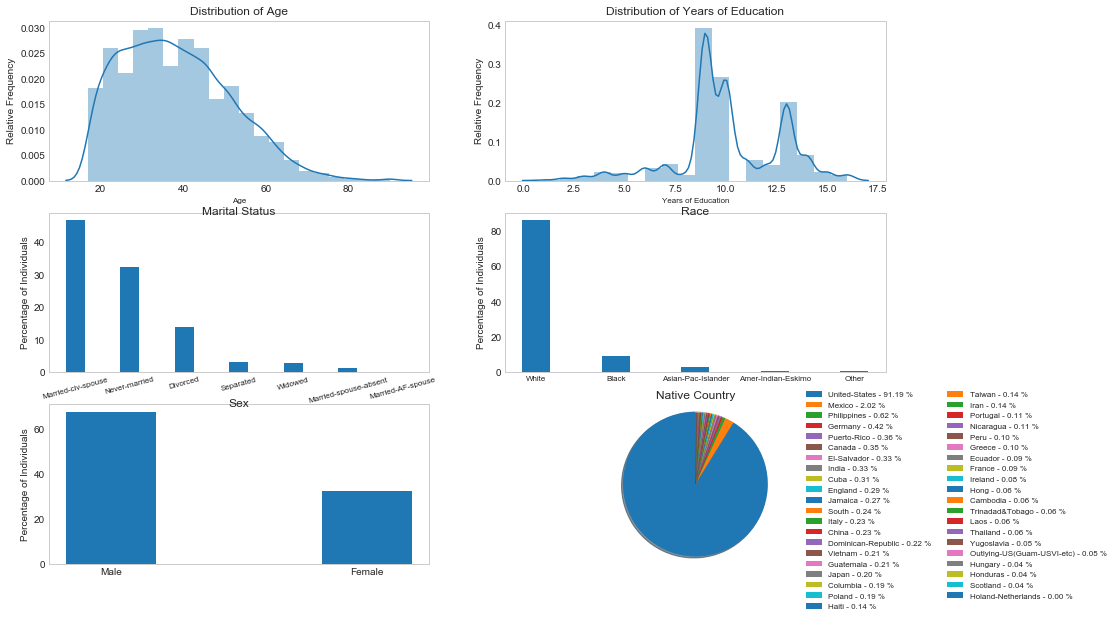

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=2)

ax1 = axes[0, 0]
sns.distplot(clean_adult["age"], bins = 20, ax = ax1)
ax1.set_title("Distribution of Age")
ax1.set_xlabel("Age", fontsize = 8)
ax1.set_ylabel("Relative Frequency")
ax1.grid(False)

ax2 = axes[0, 1]
sns.distplot(clean_adult["education.num"], bins = 18, ax = ax2)
ax2.set_title("Distribution of Years of Education")
ax2.set_xlabel("Years of Education", fontsize = 8)
ax2.set_ylabel("Relative Frequency")
ax2.grid(False)

ax3 = axes[1, 0]
counts = clean_adult["marital.status"].value_counts()
percents = 100 * counts.values/counts.values.sum()
ind = np.arange(len(percents))  
width = 0.35  
rects = ax3.bar(ind, percents, width)
ax3.set_ylabel("Percentage of Individuals")
ax3.set_xticks(ind)
ax3.set_xticklabels(counts.index, fontsize = 8, rotation = 15)
ax3.set_title("Marital Status", y = 0.95)
ax3.grid(False)

ax4 = axes[1, 1]
counts = clean_adult["race"].value_counts()
percents = 100 * counts.values/counts.values.sum()
ind = np.arange(len(percents))  
width = 0.35  
rects = ax4.bar(ind, percents, width)
ax4.set_ylabel("Percentage of Individuals")
ax4.set_xticks(ind)
ax4.set_xticklabels(counts.index, fontsize = 8)
ax4.set_title("Race", y = 0.95)
ax4.grid(False)

ax5 = axes[2, 0]
counts = clean_adult["sex"].value_counts()
percents = 100 * counts.values/counts.values.sum()
ind = np.arange(len(percents))  
width = 0.35  
rects = ax5.bar(ind, percents, width)
ax5.set_ylabel("Percentage of Individuals")
ax5.set_xticks(ind)
ax5.set_xticklabels(counts.index, fontsize = 10)
ax5.set_title("Sex", y = 0.95)
ax5.grid(False)

ax6 = axes[2, 1]
counts = clean_adult["native.country"].value_counts()
percents = 100 * counts.values/counts.values.sum()
patches, texts = ax6.pie(percents, shadow=True, startangle=90)
ax6.axis("equal")
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(counts.index, percents)]
ax6.legend(patches, labels, loc="right", ncol = 2, bbox_to_anchor=(1.6, 0.4),
           fontsize=8)
ax6.set_title("Native Country")
ax6.grid(False)

os.makedirs("fig", exist_ok=True)
fig.savefig("fig/columns.png", bbox_inches='tight')

There are a couple of interesting observations: 
* The distribution of ages is skewed to the right, which should not surprise us since as individuals get older, they leave the labor force. 
* The years of educations since 4th grade seem to have 2 peaks, one at 9 and one at 13. 9 years of education since 4th grade means the individual has graduated high school, while 13 years of education since 4th grade means the individual has graduated college. It is no surprise that most people in this dataset have a high school education or higher. 
* About 50% of the individuals in the dataset are married.
* About 85% of the individuals in the dataset identified as White. This likely include Hispanics too. 
* About 2/3 of the individuals in the dataset were male, while 1/3 of the individuals in the dataset were female. Since it was the 1994, the female labor participation was still pretty low. Now around 47 percent of the labor force is female.

In [11]:
os.makedirs("results", exist_ok=True) #Make results directory if it does not exist yet
adult.to_hdf('results/df1.h5', 'adult')
clean_adult.to_hdf('results/df1.h5', 'clean_adult')

**Testing Section**

In [12]:
import unittest

In [13]:
class MyTests(unittest.TestCase):
    
    def test_multiple_missing_indices(self):
        row0 = [">", "", "!"]
        row1 = ["3", "1", "?"]
        row2 = ["?", "10", "hello"]
        row3 = ["my", "name", "is"]
        df = pd.DataFrame([row0, row1, row2, row3])
        missing = find_indices_with_value(df, "?")
        np.testing.assert_equal(missing, np.array([1, 2]))
        
    def test_no_missing_indices(self):
        row0 = [">", "", "!"]
        row1 = ["3", "1", "4"]
        row2 = ["6", "10", "hello"]
        row3 = ["my", "name", "is"]
        df = pd.DataFrame([row0, row1, row2, row3])
        missing = find_indices_with_value(df, "?")
        np.testing.assert_equal(missing, np.array([]))
        
    def test_one_missing_index(self):
        row0 = [">", "", "!"]
        row1 = ["3", "1", "4"]
        row2 = ["6", "10", "hello"]
        row3 = ["my", "name", "?"]
        df = pd.DataFrame([row0, row1, row2, row3])
        missing = find_indices_with_value(df, "?")
        np.testing.assert_equal(missing, np.array([3]))
        
    def test_multiple_missing_on_one_index(self):
        row0 = [">", "", "!"]
        row1 = ["3", "1", "4"]
        row2 = ["6", "10", "hello"]
        row3 = ["my", "?", "?"]
        df = pd.DataFrame([row0, row1, row2, row3])
        missing = find_indices_with_value(df, "?")
        np.testing.assert_equal(missing, np.array([3]))
        
    def test_multiple_missing_on_multiple_indices(self):
        row0 = [">", "", "!"]
        row1 = ["?", "?", "4"]
        row2 = ["6", "10", "hello"]
        row3 = ["my", "?", "?"]
        df = pd.DataFrame([row0, row1, row2, row3])
        missing = find_indices_with_value(df, "?")
        np.testing.assert_equal(missing, np.array([1, 3]))
        
    def test_one_row_df(self):
        row0 = [">", "?", "!"]
        df = pd.DataFrame([row0])
        missing = find_indices_with_value(df, "?")
        np.testing.assert_equal(missing, np.array([0]))

In [14]:
unittest.main(argv=["foo"], exit = False, verbosity = 2)

test_multiple_missing_indices (__main__.MyTests) ... ok
test_multiple_missing_on_multiple_indices (__main__.MyTests) ... ok
test_multiple_missing_on_one_index (__main__.MyTests) ... ok
test_no_missing_indices (__main__.MyTests) ... ok
test_one_missing_index (__main__.MyTests) ... ok
test_one_row_df (__main__.MyTests) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.019s

OK
